<a href="https://colab.research.google.com/github/u2126450/CTI-Dissertation-Notebooks/blob/main/SupervisedCTI_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset shape: (92212, 59)


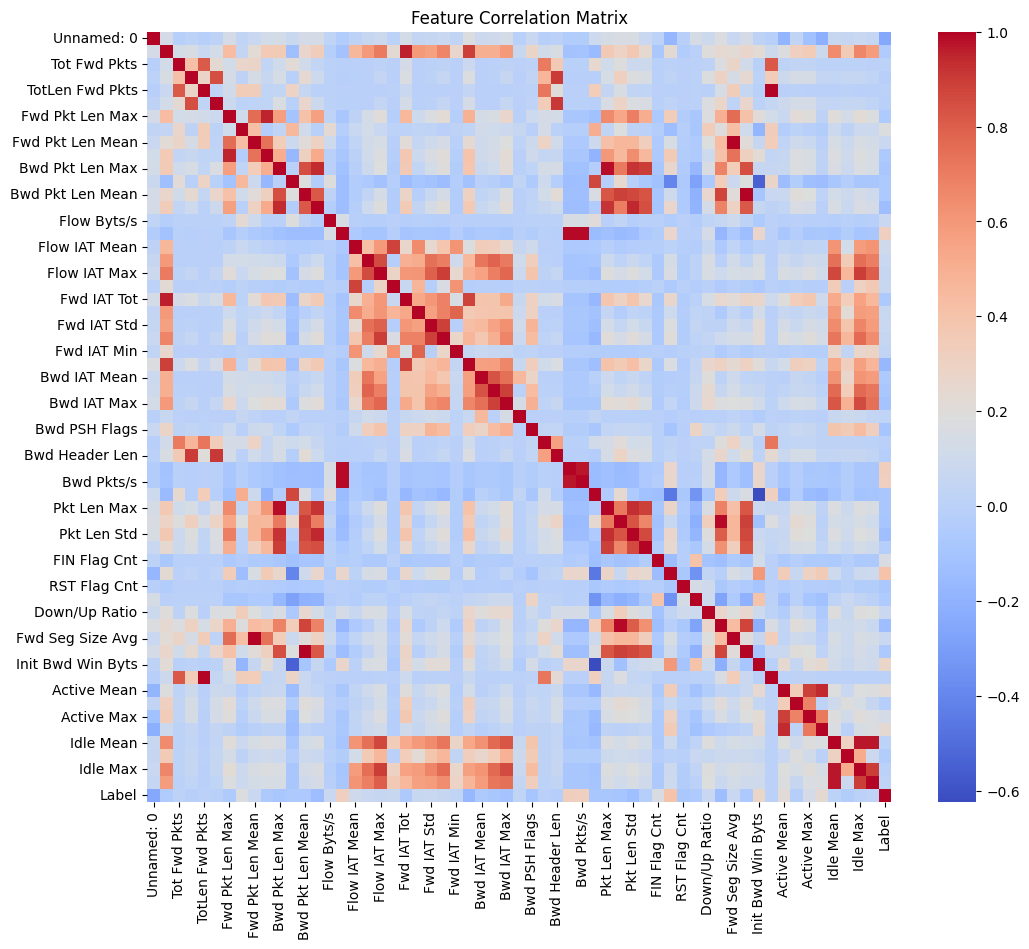


Confusion Matrix:
[[15963    31]
 [   25 11645]]

Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00     15994
   Malicious       1.00      1.00      1.00     11670

    accuracy                           1.00     27664
   macro avg       1.00      1.00      1.00     27664
weighted avg       1.00      1.00      1.00     27664



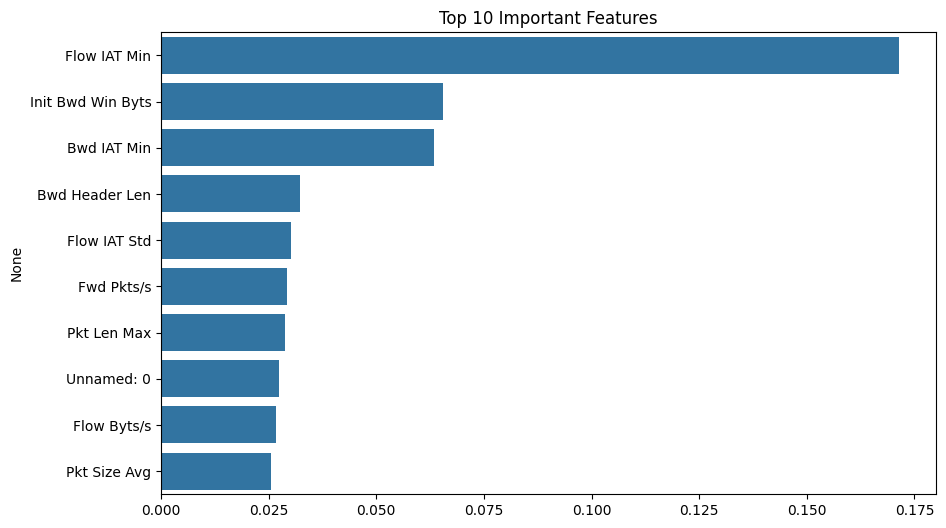


Detected 11645 malicious flows out of 27664 samples.


In [ ]:
# CTI Simulation: AI-based Threat Detection using CTU-13 Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from google.colab import drive
drive.mount('/content/drive')


# -----------------------------
# 1. Load the datasets
# -----------------------------
attack_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/CTI Simulation/CTU13_Attack_Traffic.csv")
normal_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/CTI Simulation/CTU13_Normal_Traffic.csv")

# Add labels
attack_df["Label"] = "Malicious"
normal_df["Label"] = "Benign"

# Combine the datasets
df = pd.concat([attack_df, normal_df], ignore_index=True)
print("Dataset shape:", df.shape)

# -----------------------------
# 2. Preprocessing
# -----------------------------
# Drop irrelevant or duplicate columns
df.dropna(axis=1, how='all', inplace=True)  # drop columns with all NaN
df.drop_duplicates(inplace=True)

# Encode categorical features
label_encoders = {}
for col in df.select_dtypes(include=["object"]).columns:
    if col != "Label":
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le

# Encode labels
df["Label"] = df["Label"].map({"Benign": 0, "Malicious": 1})

# Handle any remaining NaNs
df.fillna(0, inplace=True)

# -----------------------------
# 3. Feature Selection
# -----------------------------
# Correlation Heatmap (optional visualization)
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Matrix")
plt.show()

# Select features and target
X = df.drop("Label", axis=1)
y = df["Label"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -----------------------------
# 4. Train/Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# -----------------------------
# 5. Model Training
# -----------------------------
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# -----------------------------
# 6. Evaluation
# -----------------------------
y_pred = clf.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Benign", "Malicious"]))

# Feature importance visualization
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.title("Top 10 Important Features")
sns.barplot(x=importances[indices][:10], y=feature_names[indices][:10])
plt.show()

# -----------------------------
# 7. CTI Simulation Output
# -----------------------------
# Identify and print potentially malicious flows from the test set
malicious_indices = np.where((y_test.values == 1) & (y_pred == 1))[0]
suspicious_flows = pd.DataFrame(X_test[malicious_indices], columns=X.columns)
print(f"\nDetected {len(suspicious_flows)} malicious flows out of {len(y_test)} samples.")
